In [1]:
import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs

import pandas as pd #  for statistics

import datetime as dtime # for time formatting

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
mat_file = sio.loadmat('../HFT_22/CW Data/EBAY_20141119.mat')

In [3]:
LOB = mat_file['LOB']

In [4]:
LOB.dtype.names

('NumberMO',
 'VolumeMO',
 'EventTime',
 'BuyPrice',
 'SellPrice',
 'BuyVolume',
 'SellVolume',
 'MO')

In [6]:
np.shape(LOB['EventTime'][0][0])

(234000, 1)

In [7]:
LOB['EventTime'][0][0] # time is in milliseconds since midnight

array([[34200100],
       [34200200],
       [34200300],
       ...,
       [57599800],
       [57599900],
       [57600000]])

In [8]:
t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

In [9]:
np.shape(MO)

(4465, 50)

### Midprice, Microprice and Spread

In [10]:
midprice = 0.5*(bid[:,0]+ask[:,0])
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
spread = ask[:,0]-bid[:,0]

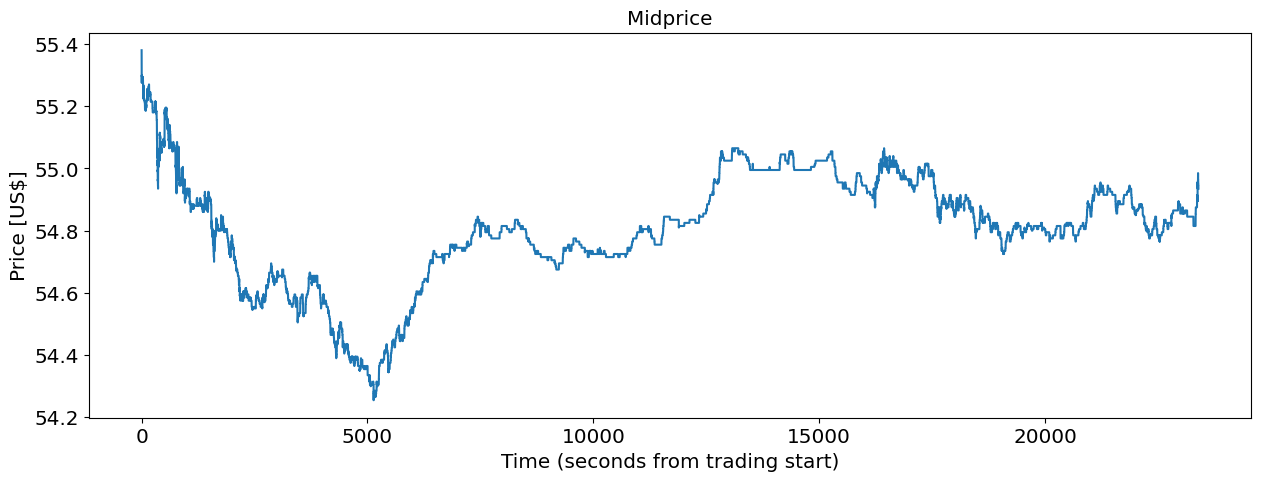

In [11]:
plt.plot(t, midprice)
plt.title('Midprice')
plt.ylabel('Price [US$]')
plt.xlabel('Time (seconds from trading start)')
plt.show()

In [12]:
mid_series = pd.Series(midprice)
mid_series.describe()

count    234000.000000
mean         54.807096
std           0.176470
min          54.255000
25%          54.725000
50%          54.815000
75%          54.925000
max          55.380000
dtype: float64

In [13]:
print(f'Opening Midprice: {midprice[0]}')
print(f'Closing Midprice: {midprice[-1]}')

Opening Midprice: 55.38
Closing Midprice: 54.935


In [14]:
min_time = dtime.timedelta(microseconds = midprice.argmin()*1e5)
max_time = dtime.timedelta(microseconds = midprice.argmax()*1e5)
print(f'Minimum price {round(midprice.min(), 6)} reached at {min_time} after trading start (tick {midprice.argmin()})')
print(f'Maximum price {round(midprice.max(), 6)} reached at {max_time} after trading start (tick {midprice.argmax()})')

Minimum price 54.255 reached at 1:25:36.200000 after trading start (tick 51362)
Maximum price 55.38 reached at 0:00:00 after trading start (tick 0)


### Plot Microprice

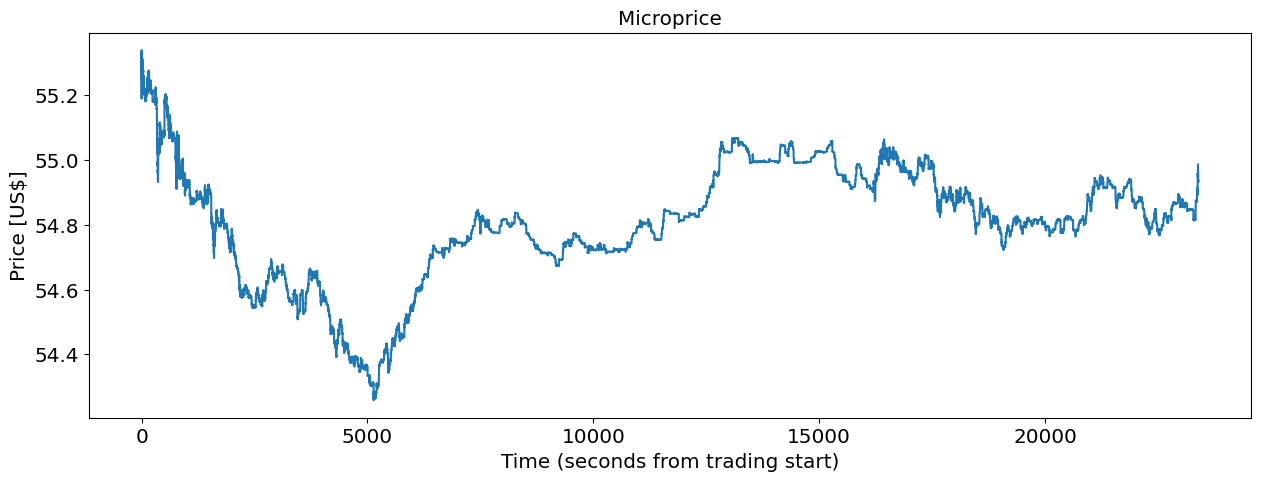

In [15]:
plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('Price [US$]')
plt.xlabel('Time (seconds from trading start)')
plt.show()

In [16]:
micro_series = pd.Series(microprice)
micro_series.describe()

count    234000.000000
mean         54.806953
std           0.176827
min          54.258000
25%          54.725042
50%          54.814931
75%          54.928342
max          55.339506
dtype: float64

In [17]:
print(f'Opening Microprice: {round(microprice[0], 6)}')
print(f'Closing Microprice: {round(microprice[-1], 6)}')

Opening Microprice: 55.328571
Closing Microprice: 54.933784


In [18]:
min_time = dtime.timedelta(microseconds = microprice.argmin()*1e5)
max_time = dtime.timedelta(microseconds = microprice.argmax()*1e5)
print(f'Minimum price {round(microprice.min(), 6)} reached at {min_time} after trading start (tick {microprice.argmin()})')
print(f'Maximum price {round(microprice.max(), 6)} reached at {max_time} after trading start (tick {microprice.argmax()})')

Minimum price 54.258 reached at 1:25:36.200000 after trading start (tick 51362)
Maximum price 55.339506 reached at 0:00:00.600000 after trading start (tick 6)


### Difference between Midprice and Microsprice

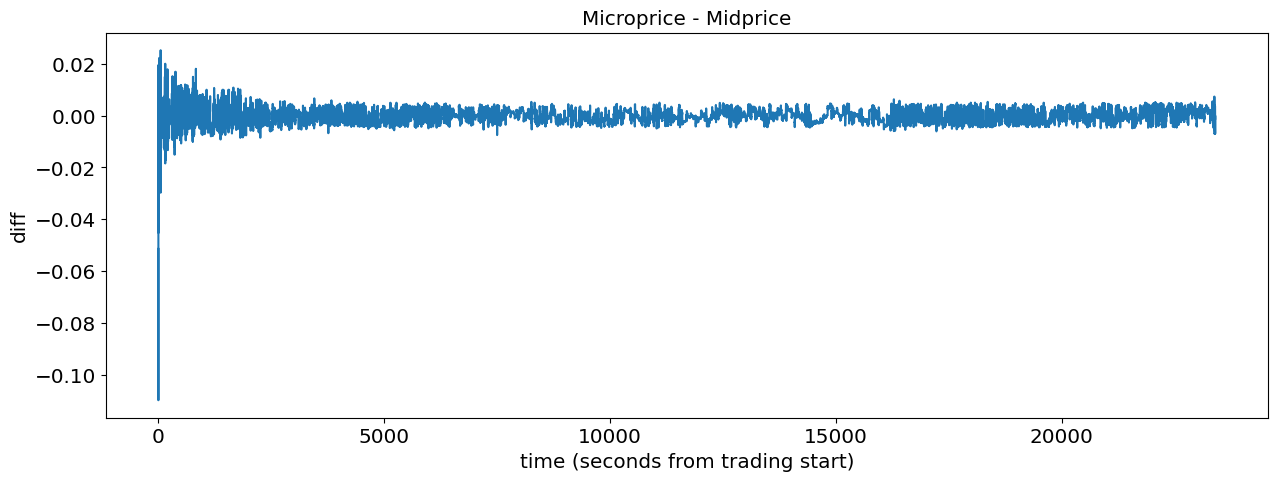

In [19]:
plt.plot(t, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

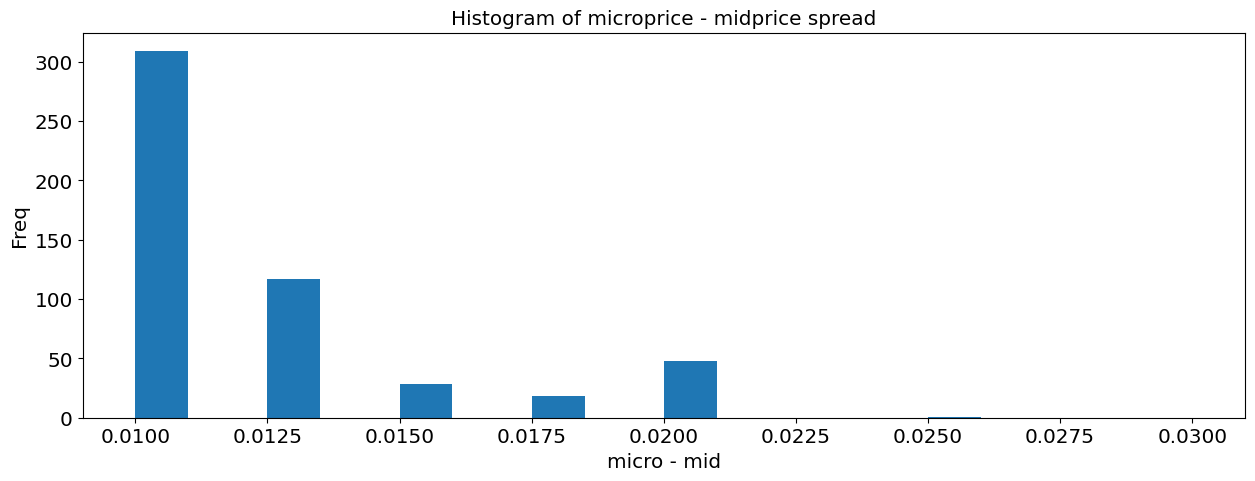

In [20]:
plt.hist(microprice - midprice,bins=np.linspace(0.01, 0.03, 9) , width=0.001,align='mid') 
plt.title("Histogram of microprice - midprice spread")
plt.xlabel(r'micro - mid')
plt.ylabel('Freq')
plt.show()

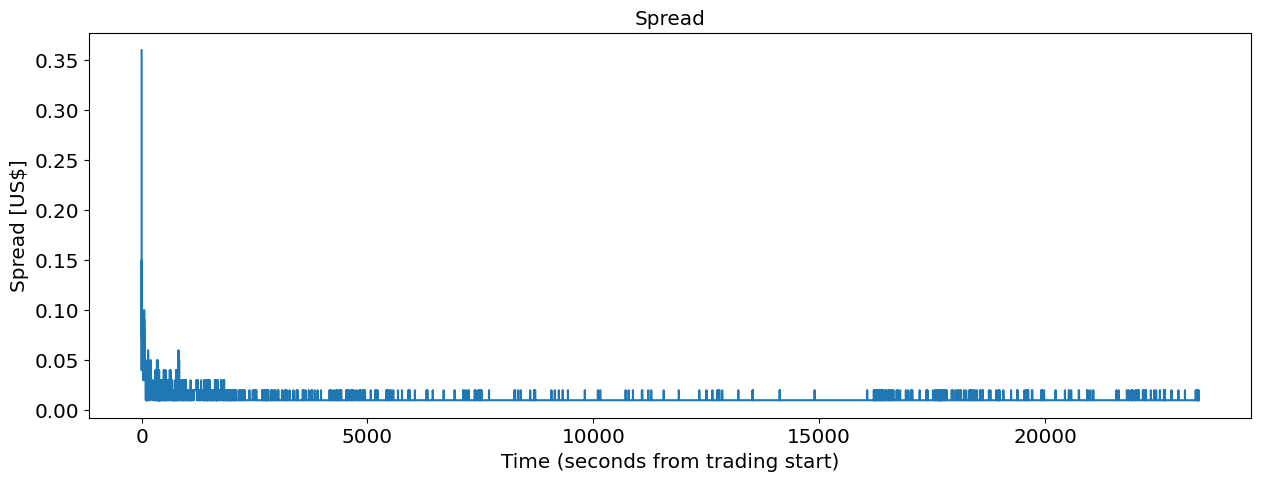

In [21]:
plt.plot(t,spread)
plt.title('Spread')
plt.ylabel('Spread [US$]')
plt.xlabel('Time (seconds from trading start)')
plt.show()

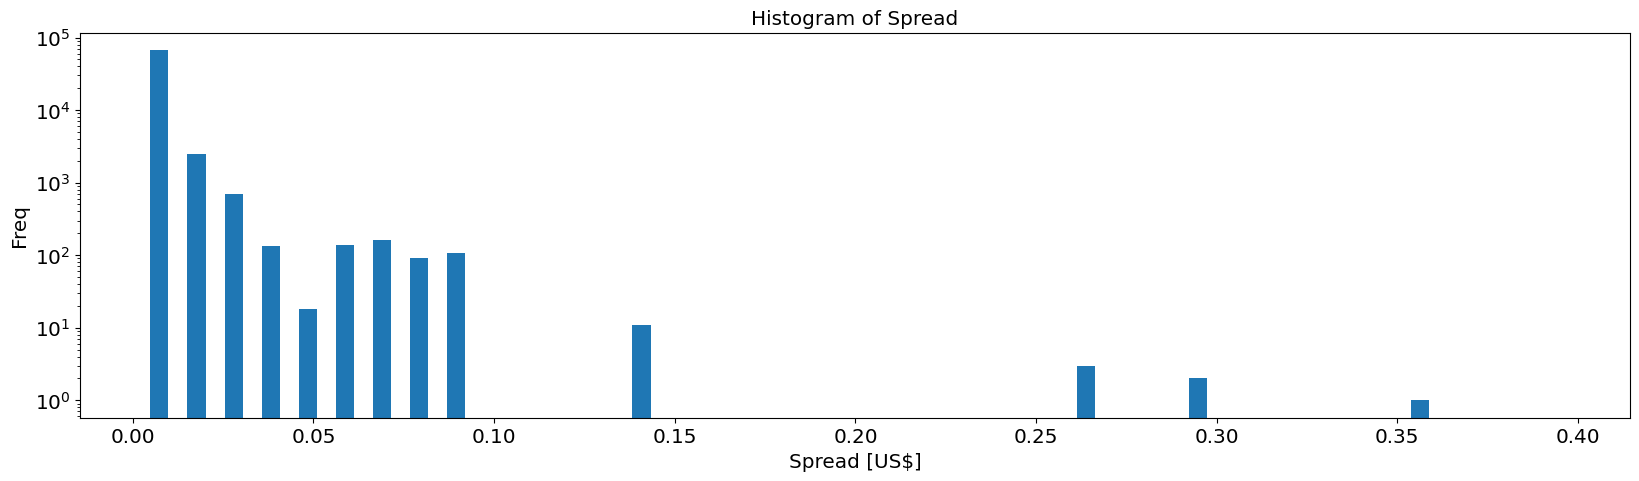

In [22]:
plt.figure(figsize=(20, 5))
plt.hist(spread,bins=np.linspace(0.01, 0.4, 39), width=0.005,align='left') 
plt.title("Histogram of Spread")
plt.xlabel(r'Spread [US$]')
plt.ylabel('Freq')
plt.yscale('log')
plt.show()

In [23]:
spread001 = sum(spread < 0.015)
print(f'Spread at 0.01 for {round(100*spread001/len(spread), 2)}% of time')

Spread at 0.01 for 92.65% of time


In [24]:
len(spread)

234000

## Limit Order Volume Imbalance

In [25]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

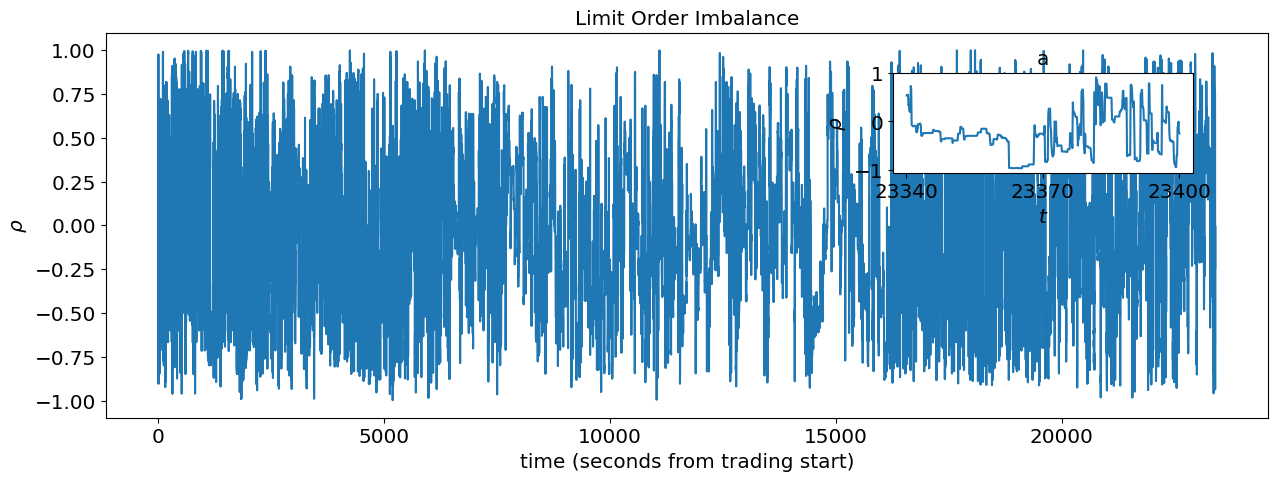

In [26]:
plt.plot(t, rho)
plt.title('Limit Order Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>23400-60) & (t<=23400)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([23400-60,23400-30,23400])

plt.show()

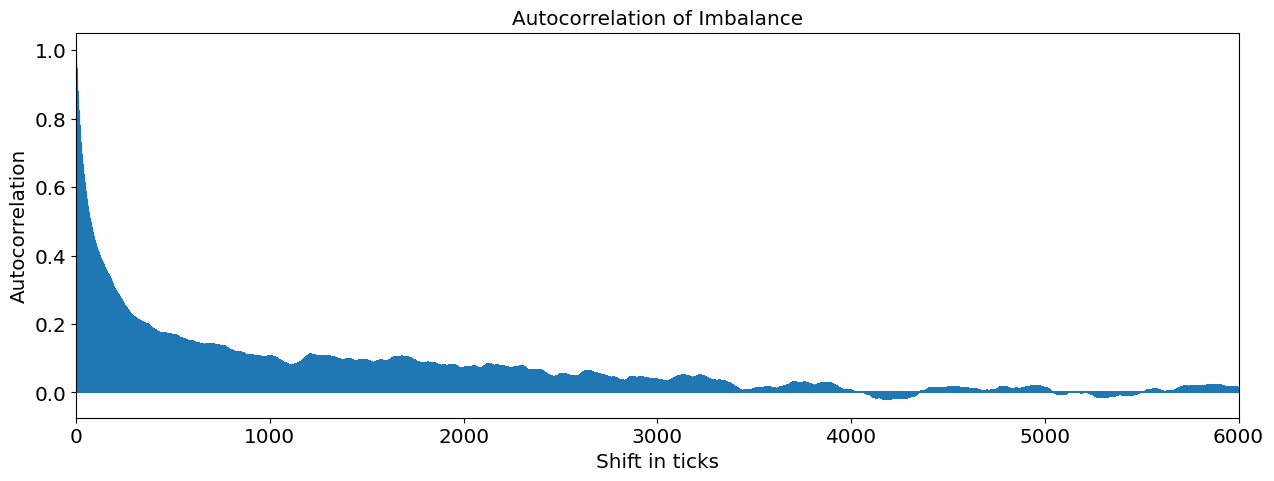

In [27]:
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of Imbalance')
plt.xlim([0,6000])
plt.ylabel(r'Autocorrelation')
plt.xlabel(r'Shift in ticks')
plt.show()

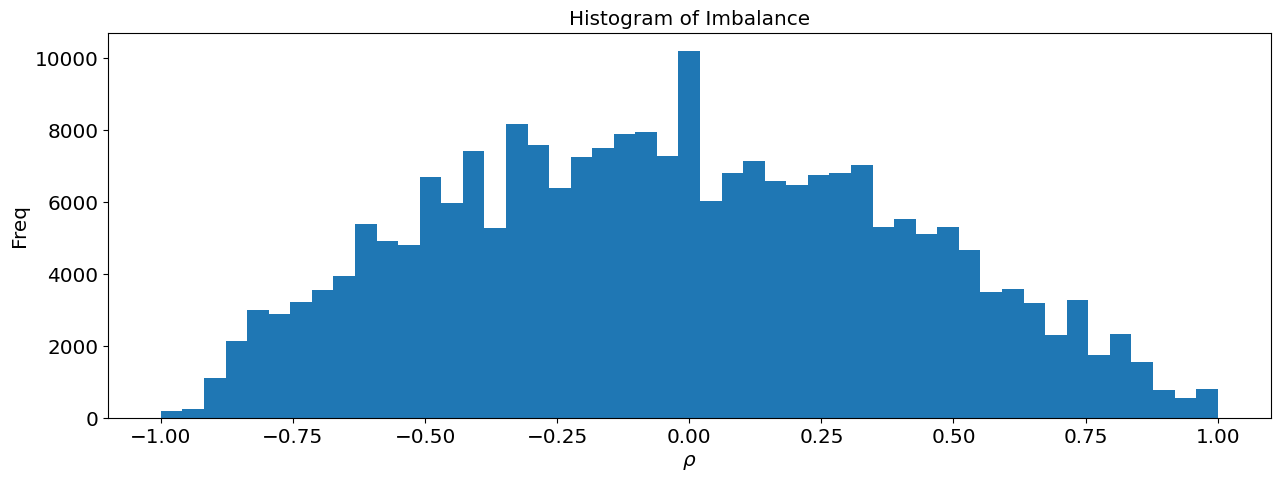

In [28]:
plt.hist(rho[:,0], bins=np.linspace(-1, 1, num=50)) 
plt.title("Histogram of Imbalance")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

In [29]:
pd.Series(rho[:,0]).describe()

count    234000.000000
mean         -0.032488
std           0.432033
min          -0.998257
25%          -0.367039
50%          -0.040693
75%           0.294118
max           0.999272
dtype: float64

## Volume Imbalance at times of Market Orders

In [30]:
rho_MO = (MO[:,3]-MO[:,4])/(MO[:,3]+MO[:,4])

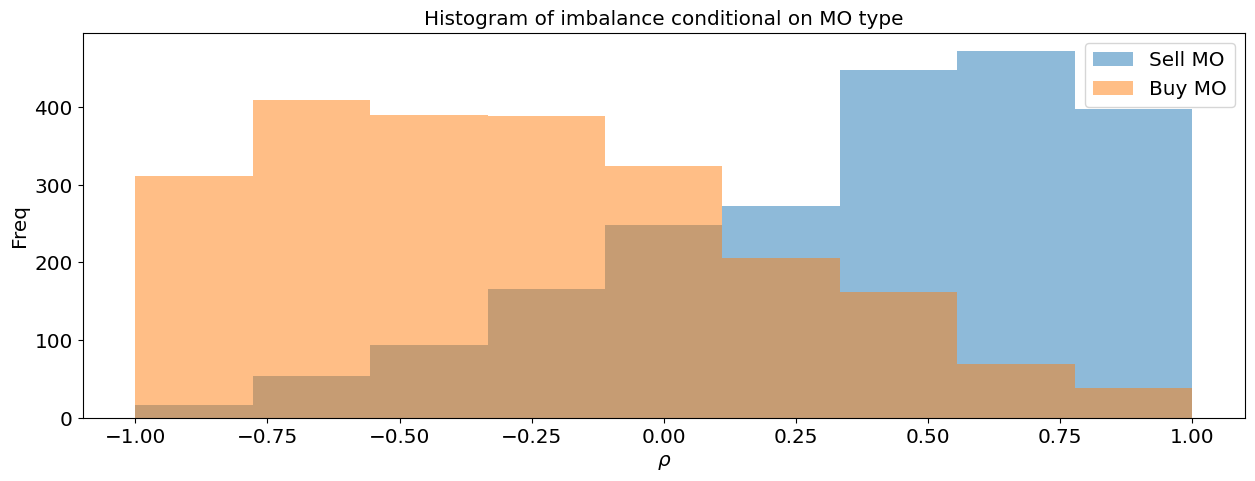

In [31]:
plt.hist(rho_MO[MO[:,7]==-1], bins=np.linspace(-1, 1, num=10),alpha=0.5) # sell orders
plt.hist(rho_MO[MO[:,7]==+1], bins=np.linspace(-1, 1, num=10),alpha=0.5) # buy orders
plt.title("Histogram of imbalance conditional on MO type")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.legend(['Sell MO', 'Buy MO'])
plt.show()

# Liquidation with Permanent Price Impact
This section is copied and slightly modified from the book "Algorithmic and High-Frequency Trading" by Cartea, Jaimungal and Penalva (2015).  
The modifications include a parameter for the number of shares, making it possible to submit a range of alpha instead of phi and fixing the slider implementation

In [32]:
# Import necessary libraries.
import numpy as np
import import_ipynb
import Liquidation_Permanent_Price_Impact_helper as lppi_helpers

importing Jupyter notebook from Liquidation_Permanent_Price_Impact_helper.ipynb


The following code computes the optimal speed to trade at $\nu_t^*$ and inventory along the optimal strategy $Q_t^{\nu^*}$.

In [33]:
# Parameter settings
R = 1000 # inventory size
T = 1 # the time horizon is from 0 to 1. 
Ndt = 6.5 * 3600 *10 # We are able to trade 10 times/s during the whole trading day of 6.5h, this is also how the data in the LOB was provided
dt = T / Ndt
t = np.arange(0, T + dt, dt)

k = 0.0008 # temporary price impact parameter
b = 0.0016 # permanent price impact parameter

tau = T - t
tt = np.arange(0, 1 + 1 / 10, 1 / 10)

phi = 0.001
myphi = np.array([1e-6, 0.001, 0.01, 0.1, 0.5])  # different variations of the running penalty parameter
symb = np.array(["o", "*", "+", "^", "x"])

alpha = 0.02  # terminal liquidation penalty parameter
myalpha = np.array([0.001, 0.004, 0.01])  

Now we use show the change of the investor's inventory along the optimal path for various levels of the running penalty $\phi$ as $\alpha$ changes.

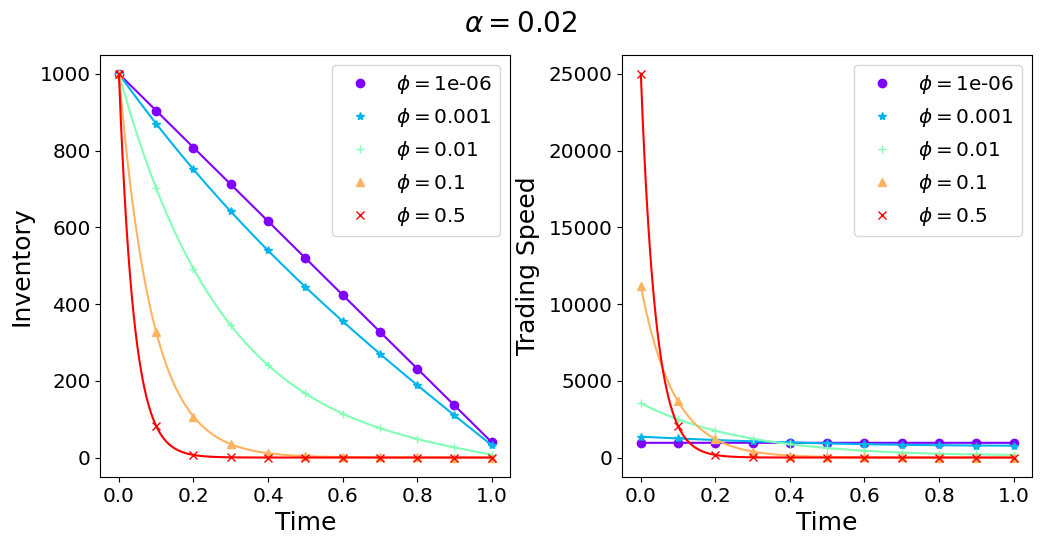

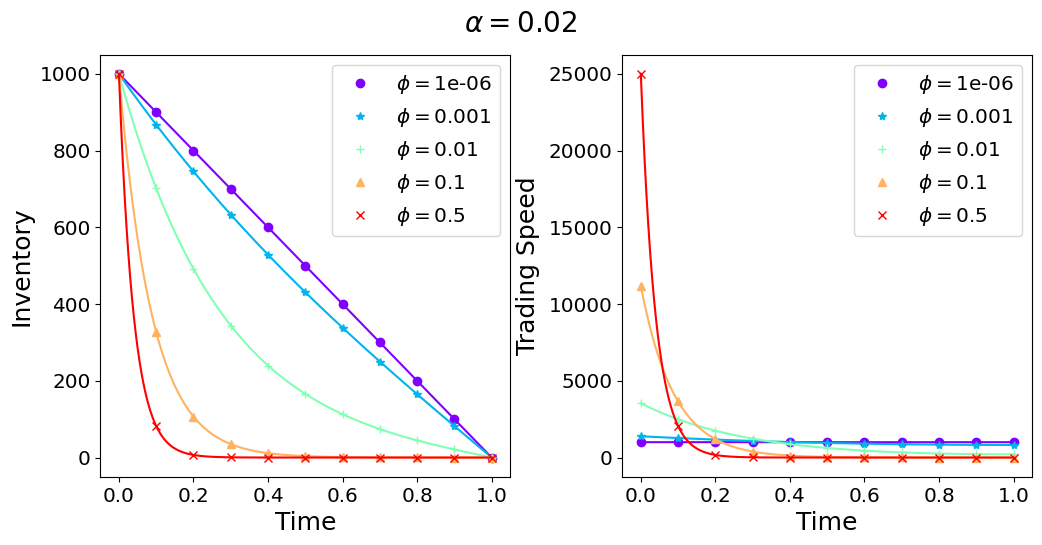

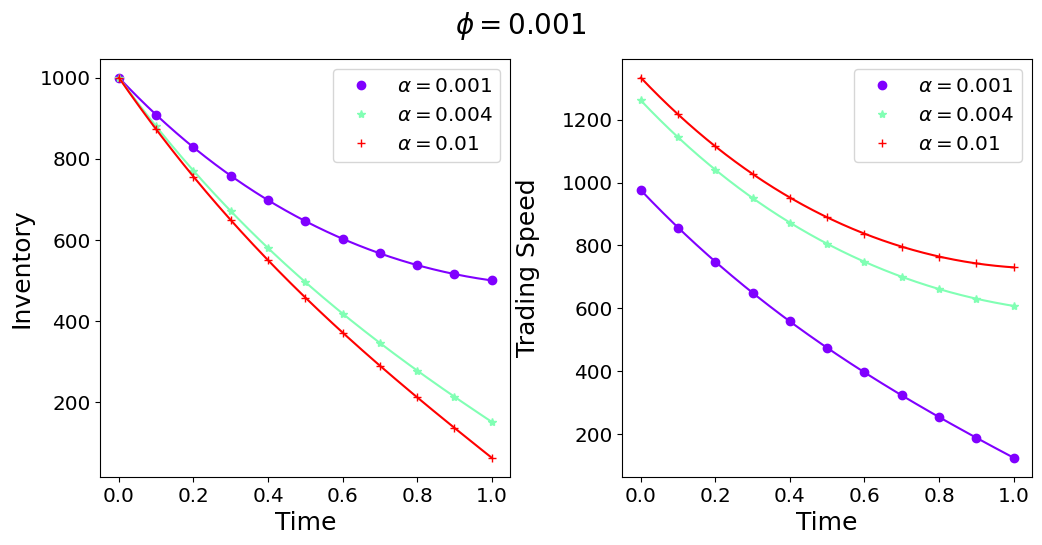

In [34]:
lppi_helpers.plot_inventory_trading_speed(alpha, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = $"+str(alpha), r=R)
lppi_helpers.plot_inventory_trading_speed(100, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = $"+str(0.02), r=R)
lppi_helpers.plot_inventory_trading_speed(myalpha, phi, symb, t, tt, T, b, k, [r"$\alpha = $" + str(i) for i in myalpha], main=r"$\phi = $"+str(phi), r=R)

In [35]:
lppi_helpers.slider_plot_inventory_trading_speed(myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi])#, r=R)

interactive(children=(FloatSlider(value=0.01, description='alpha', max=0.01, min=0.001, step=0.001), Output())…

# Appendix
Other interesting graphs but no wordcount..

In [36]:
# parameters
S0 = 100
N = 1000 #Initial number of stocks
T = 1; 
k = 1e-3;
b = 1e-3
M = 10000;    #Number of trading times
alpha = 10**2; 
phi = 0.001;
sigma = 0.30;

## Simulate Liquidation

In [37]:
def simulate_liquidation(T, k, b, alpha, phi, N, M):
    # Calculate dependent parameters
    gamma = np.sqrt(phi/k)
    xi = (alpha - 0.5 * b + np.sqrt(k * phi))/(alpha - 0.5 * b - np.sqrt(k * phi))
    vector_length = 1 if xi.shape == () else xi.shape[0]
    # Setup t, v, and q
    t_space = np.linspace(0, 1, M + 1)
    v = np.empty((M + 1, vector_length))
    q = np.empty((M + 1, vector_length))
    
    v[0] = np.zeros((vector_length))
    q[0] = np.full((vector_length), N)
    # simulate in M steps
    for t in range(1, M + 1):
        prev_t = t_space[t-1]
        v[t] = gamma * (xi * np.exp(gamma * (T-prev_t)) + np.exp(- gamma * (T-prev_t))) / (xi * np.exp(gamma * (T-prev_t)) - np.exp(- gamma * (T-prev_t))) * q[t-1] * T/M
        q[t] = (xi * np.exp(gamma * (T-prev_t)) - np.exp(- gamma * (T-prev_t))) / (xi * np.exp(gamma * T) - np.exp(- gamma * T)) * N
    return t_space, v, q

# Plots

In [38]:
def plot3d(x, y, z, x_label, y_label, z_label, title, angle=None):
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection='3d')
    x_mesh, y_mesh = np.meshgrid(x, y)
    surf = ax.plot_surface(x_mesh, y_mesh, z, rstride=1, cstride=1, cmap=plt.cm.seismic, linewidth=1, alpha=0.9, antialiased=True)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label.ljust(5)) # Ensure label is vertical to avoid overlap with colorbar
    ax.set_title(title)
    if angle != None:
        ax.view_init(30, angle)
    return fig.colorbar(surf, shrink=0.5, aspect=5)

In [39]:
alpha_space = np.geomspace(1e-1, 10, 51)

In [40]:
t, v, q = simulate_liquidation(T, k, b, alpha_space, phi, N, M)

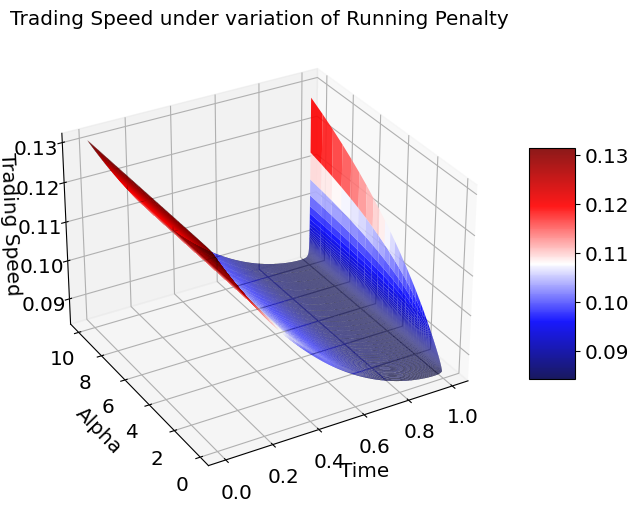

In [41]:
plot3d(t[1:], alpha_space,  v[1:].T, "Time", "Alpha","Trading Speed", "Trading Speed under variation of Running Penalty", angle=-120)

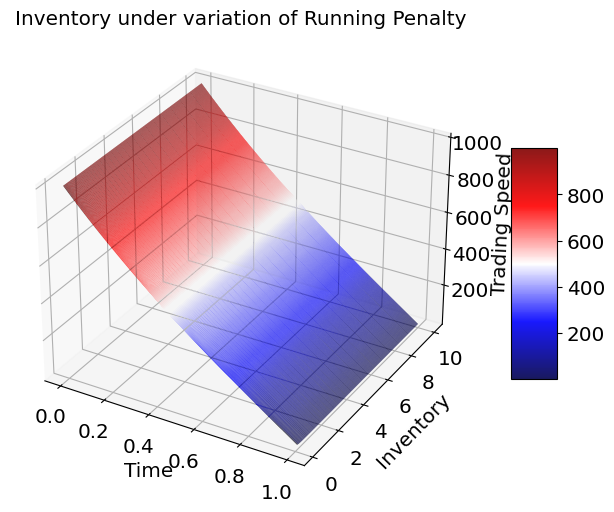

In [42]:
plot3d(t[1:], alpha_space,  q[1:].T, "Time", "Inventory","Trading Speed", "Inventory under variation of Running Penalty")